## Nama : Diyang Raditya Anwar
## Mata Kuliah : Analisis Data Penelitian Kuantitatif
## Program Studi : Sistem Informasi

---
## Tugas Penerapan ANN

## Australia Rain Prediction

Data ini mengandung observasi cuaca keseharian selama 10 tahun dari berbagai stasiun cuaca Australia. RainTomorrow adalah variabel targetnya untuk diprediksi. Sumber datanya sebagai berikut : https://www.kaggle.com/code/karnikakapoor/rain-prediction-ann/input

### import library-library yang dibutuhkan

In [25]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import missingno as msno

import torch
import torch.nn as nn
import torch.optim as optim

import warnings
warnings.filterwarnings('ignore')

torch.manual_seed(42)

In [18]:
if torch.cuda.is_available():
    device = "cuda"
    print("CUDA is available. Running on GPU.")
else:
    device = "cpu"
    print("CUDA is not available. Running on CPU.")

CUDA is available. Running on GPU.


### Import datanya

In [11]:
data = pd.read_csv('../Datasets/ann-task/weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


<Axes: >

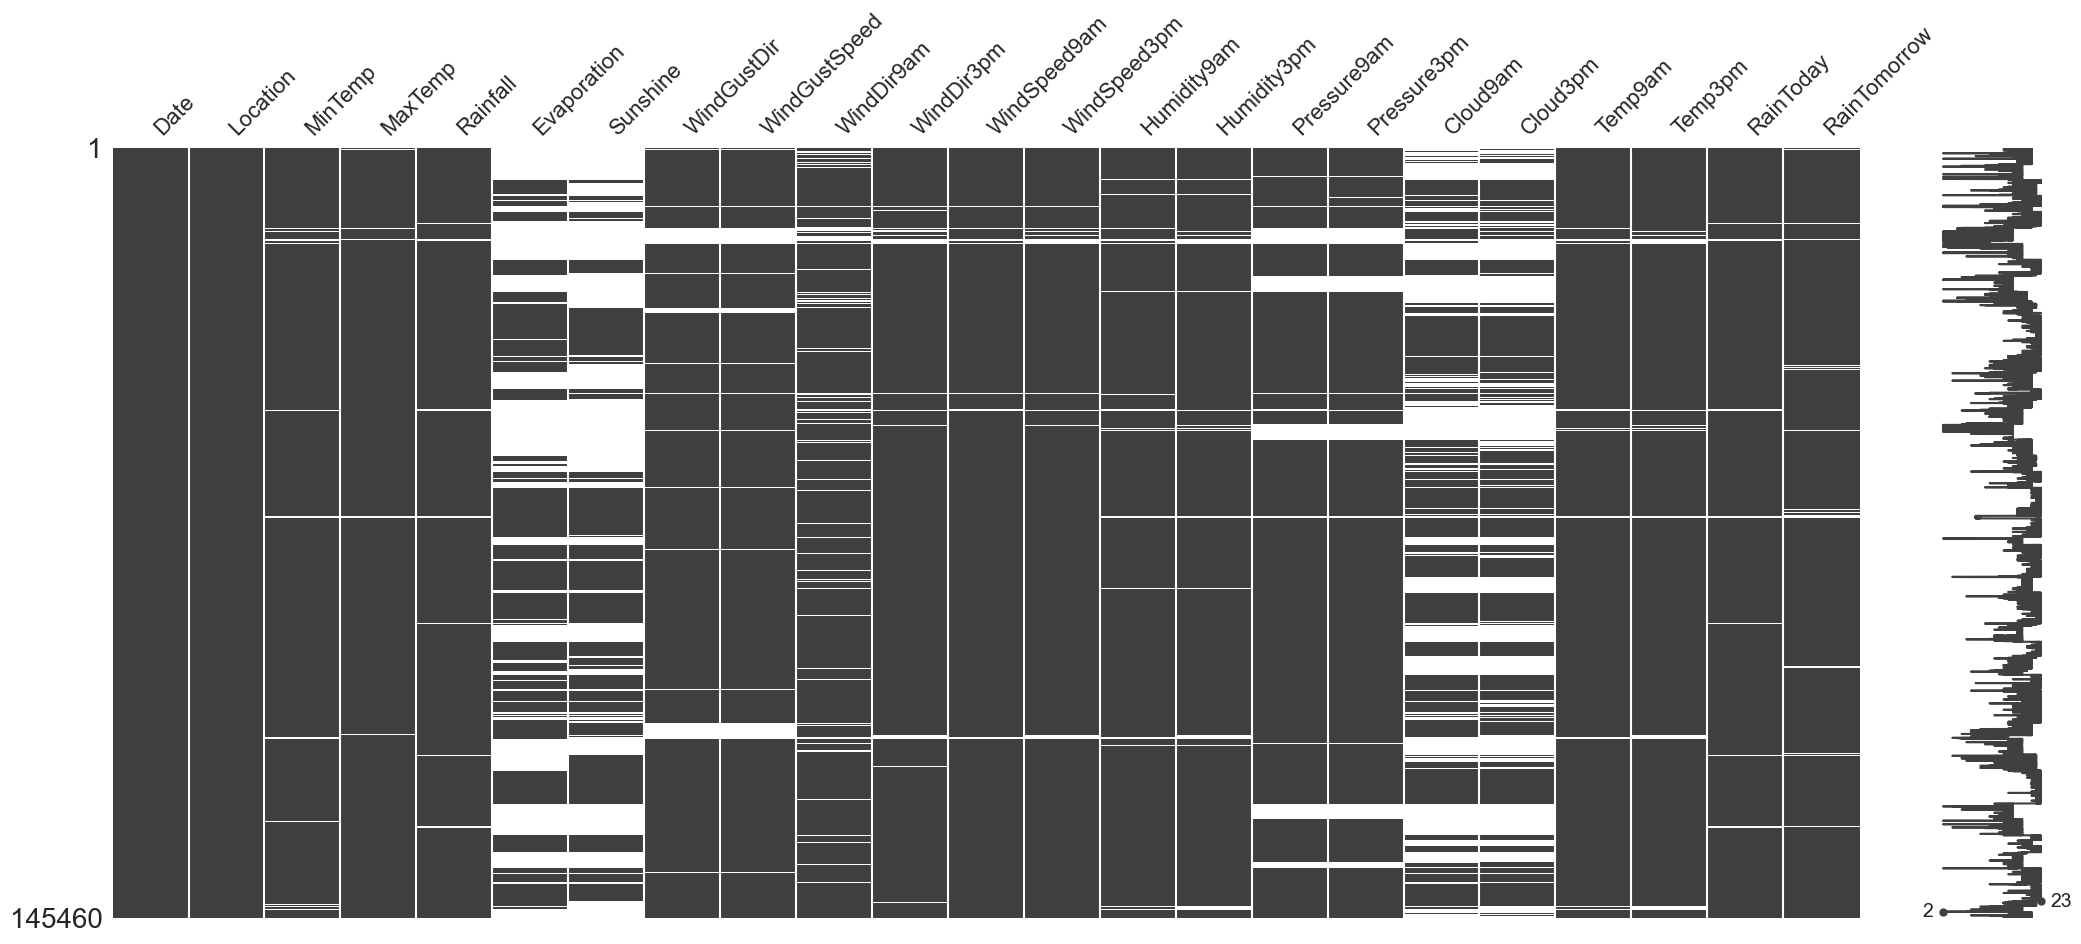

In [4]:
msno.matrix(data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Memeriksa seberapa banyak data yang kosong

In [6]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

setelah diperiksa ternyata data yang kosong, mesti dirapihkan terlebih dahulu datanya seperti diinput data yang kosong. Sebelum itu kita cek distribusi datanya

In [7]:
cate_var = data.select_dtypes(include=['object', 'string'])
num_var = data.select_dtypes(exclude=['object'])

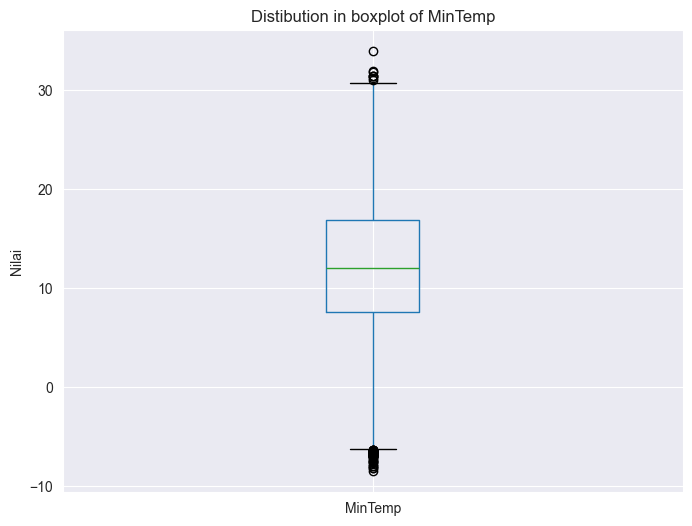

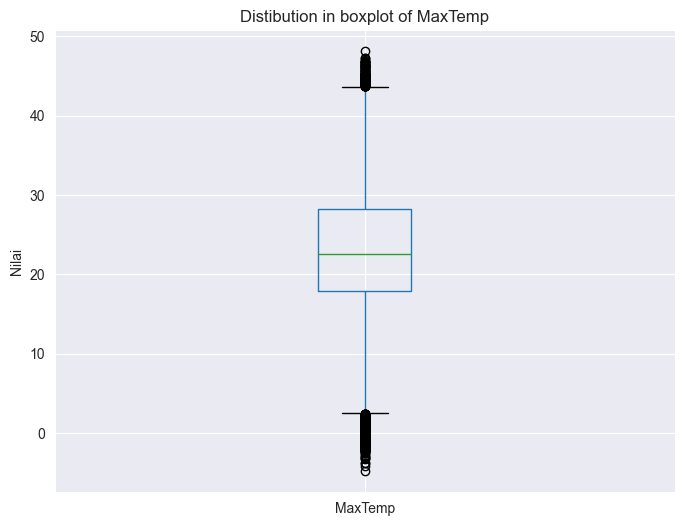

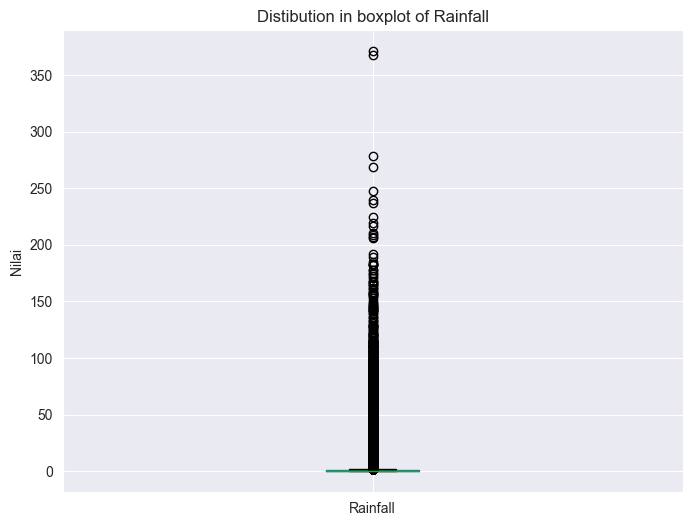

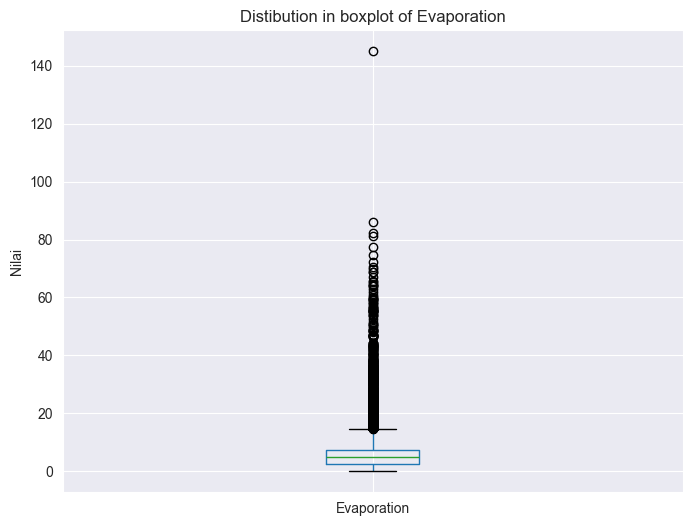

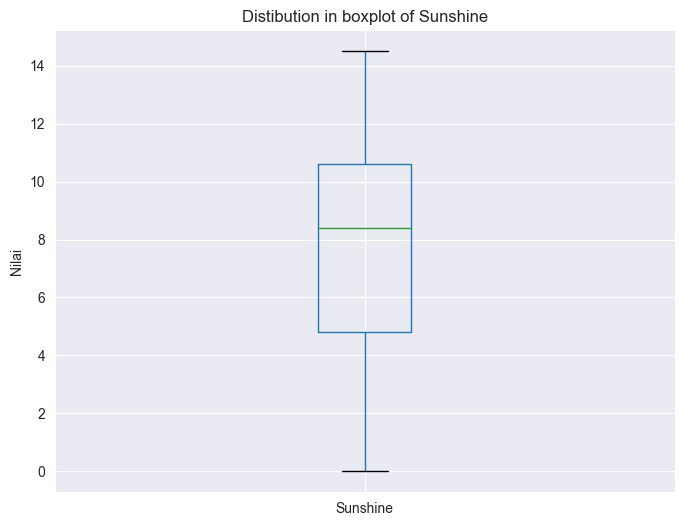

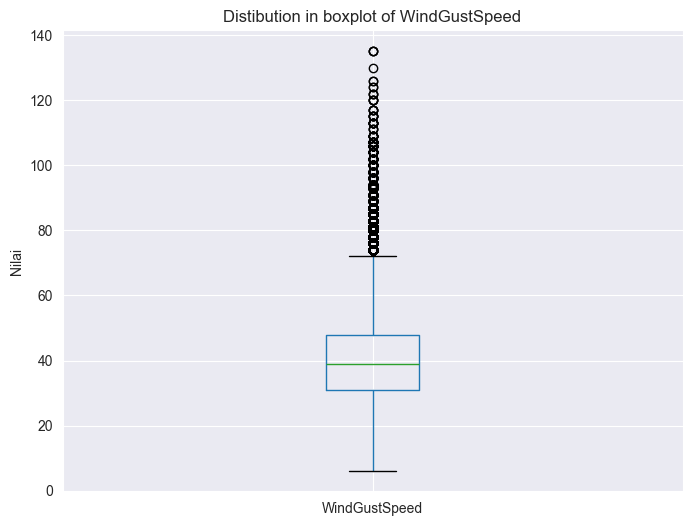

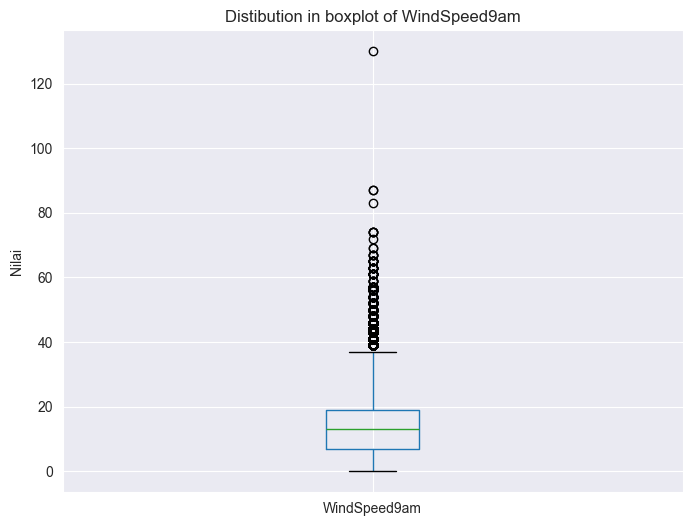

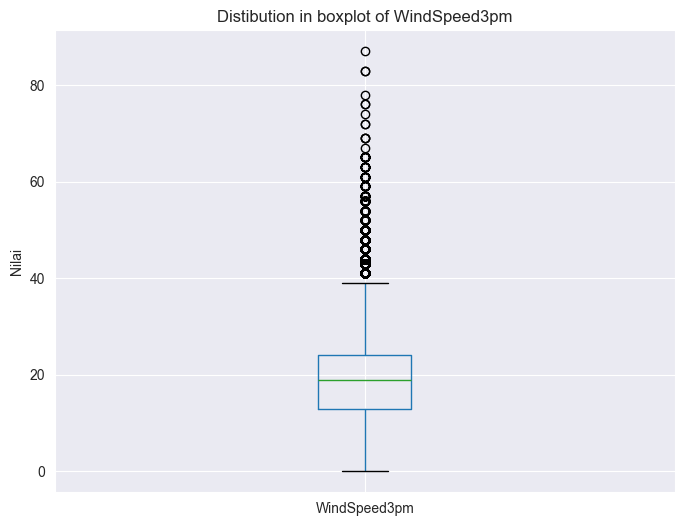

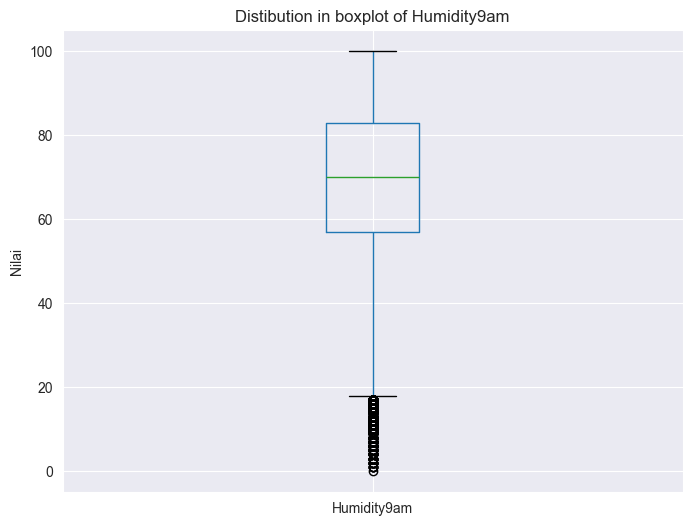

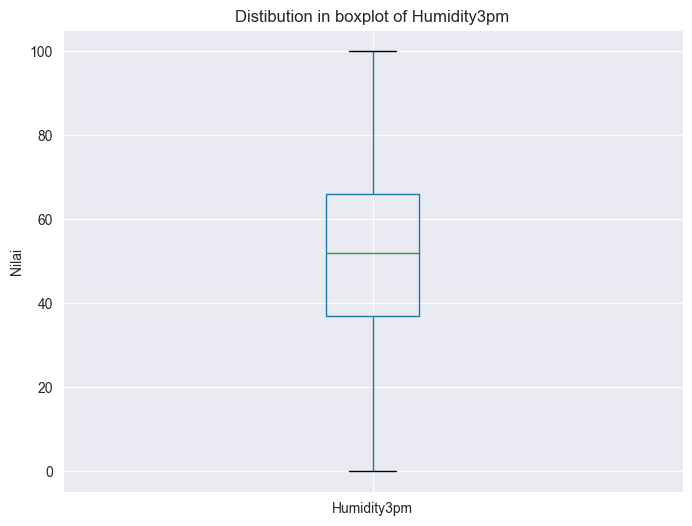

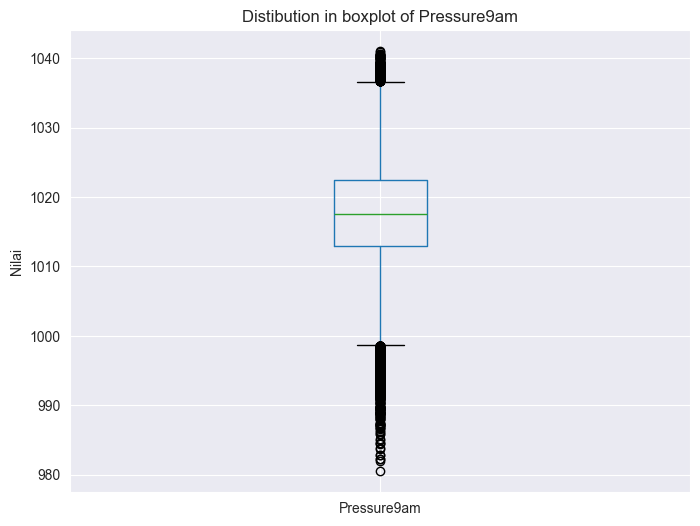

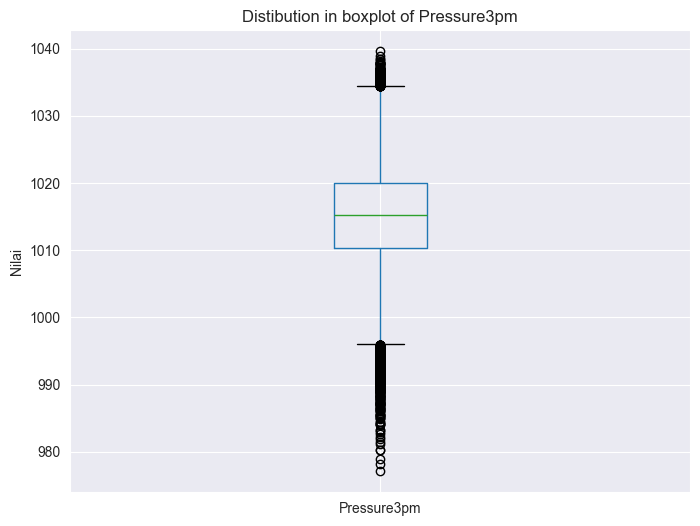

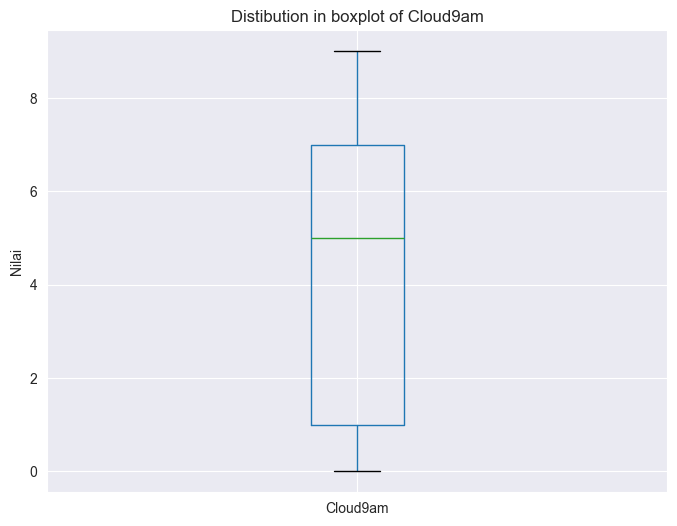

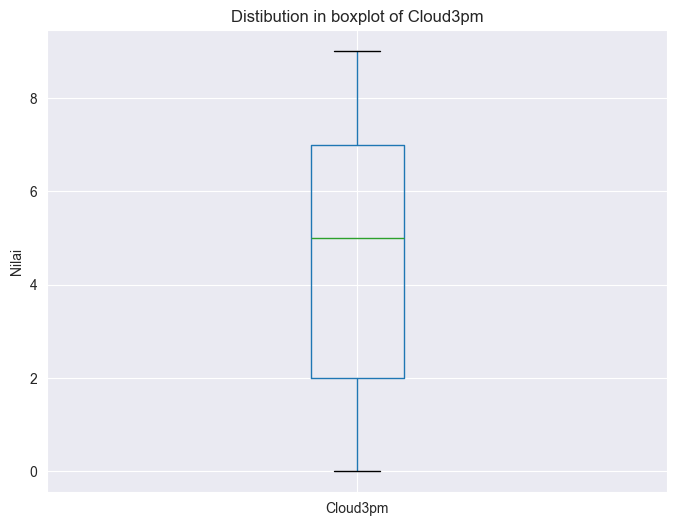

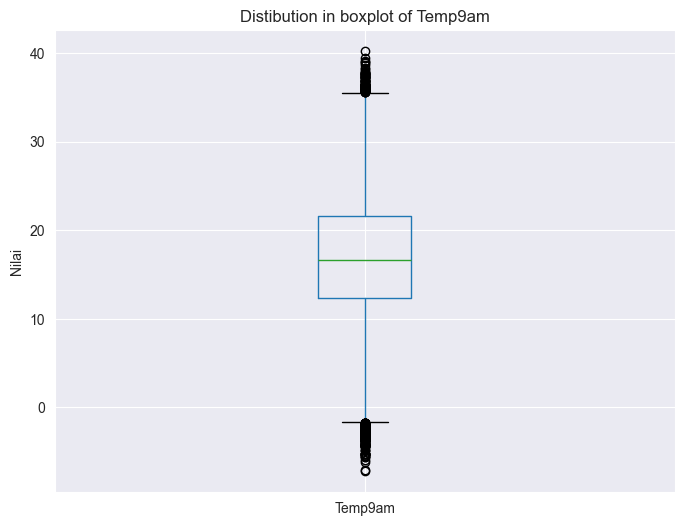

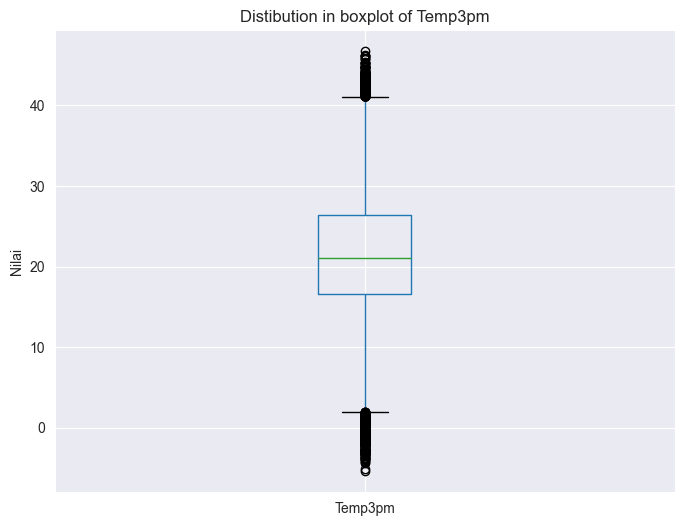

In [8]:
for col in num_var:
    plt.figure(figsize=(8, 6))
    data.boxplot(column=col)
    plt.title(f"Distibution in boxplot of {col}")
    plt.ylabel("Nilai")
    plt.show()

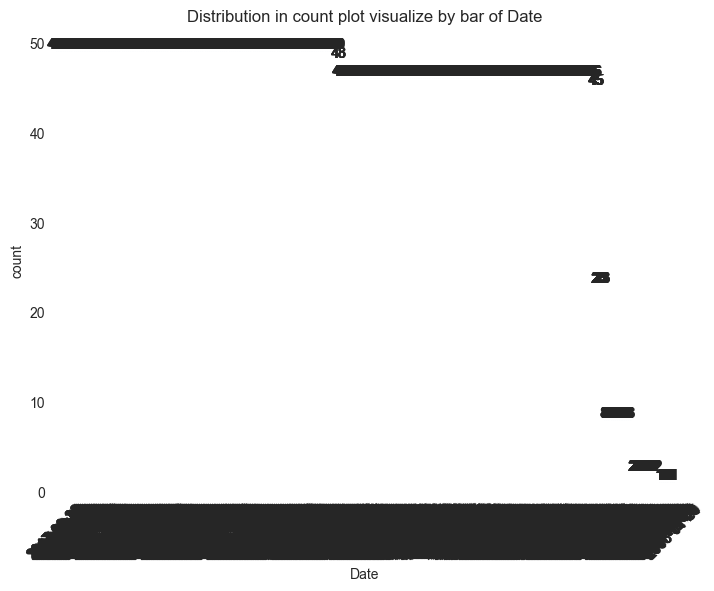

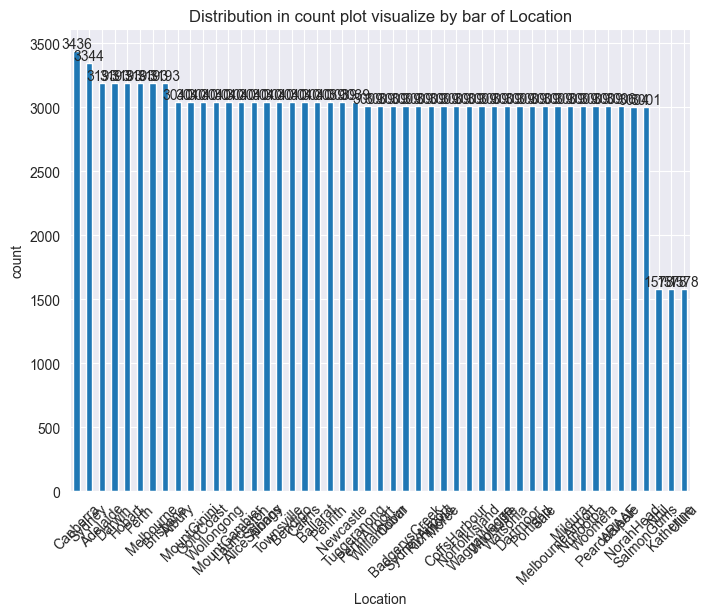

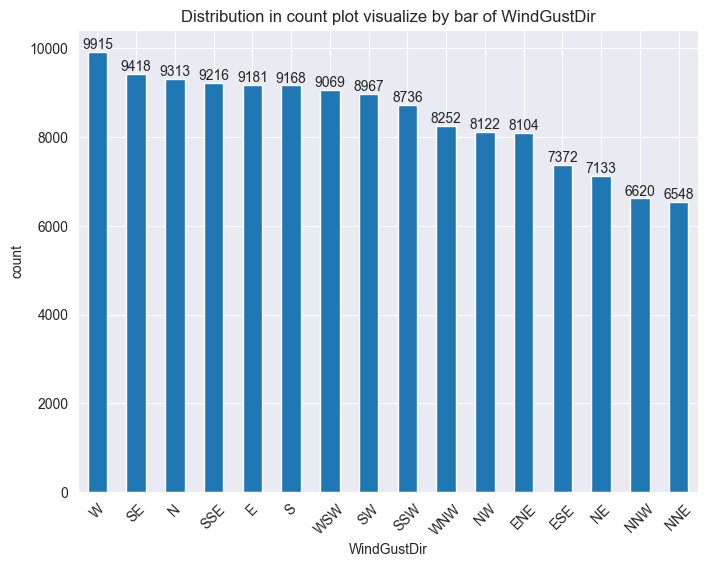

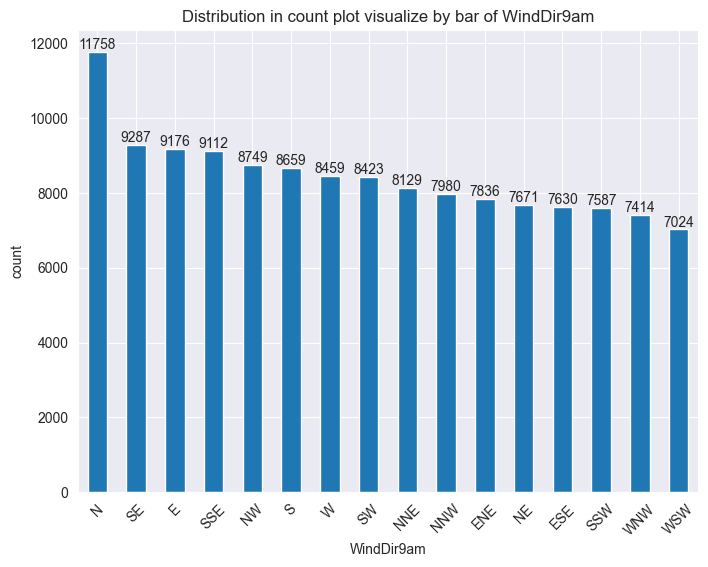

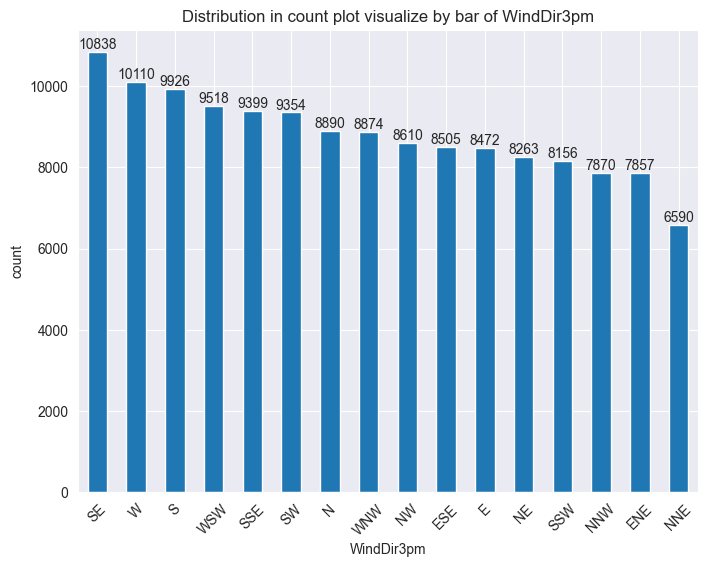

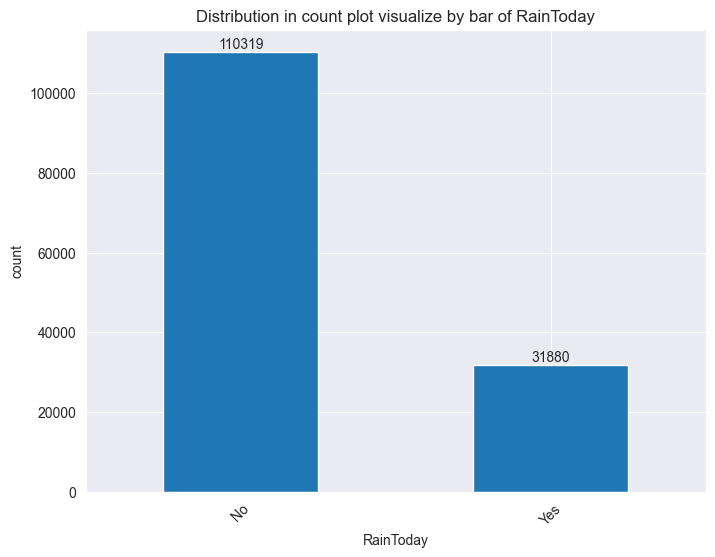

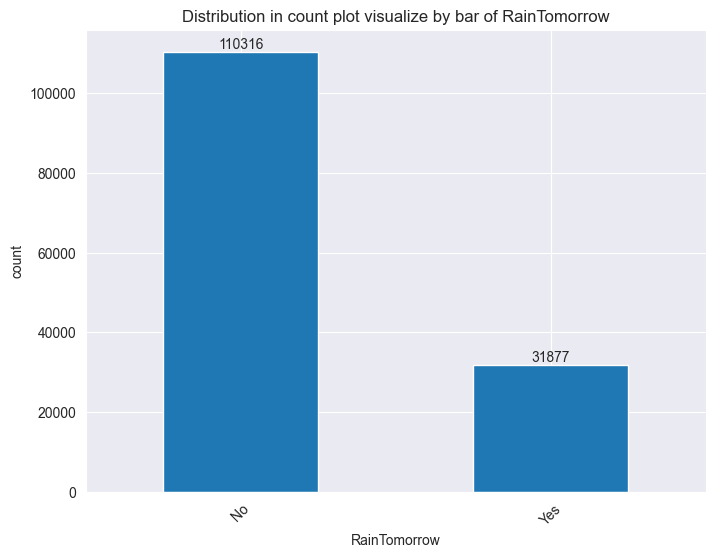

In [9]:
for i in cate_var:
    plt.figure(figsize=(8, 6))
    count = cate_var[i].value_counts()
    plot = count.plot(kind='bar')
    plt.title(f"Distribution in count plot visualize by bar of {i}")
    plt.ylabel("count")
    plt.xlabel(i)
    plt.xticks(rotation=45)
    
    for v in range(len(count)):
        plt.text(v, count[v], str(count[v]), ha='center', va='bottom')
    
    plt.show()

Saat melakukan pembersihan data seperti imputasi / penghapusan data 

In [14]:
cat_vari = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

for col in cat_vari:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [15]:
label_encode = {}

for col in cat_vari:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encode[col] = le

In [16]:
# Untuk data timeseries kit akan imputasi menggunakan KNN Imputer karena KNN Imputer salah satu metode imputasi terbaik untuk data timeseries

num_vari = data.select_dtypes(include=['float64']).columns

ki = KNNImputer(n_neighbors=5)

data[num_vari] = ki.fit_transform(data[num_vari])

<Axes: >

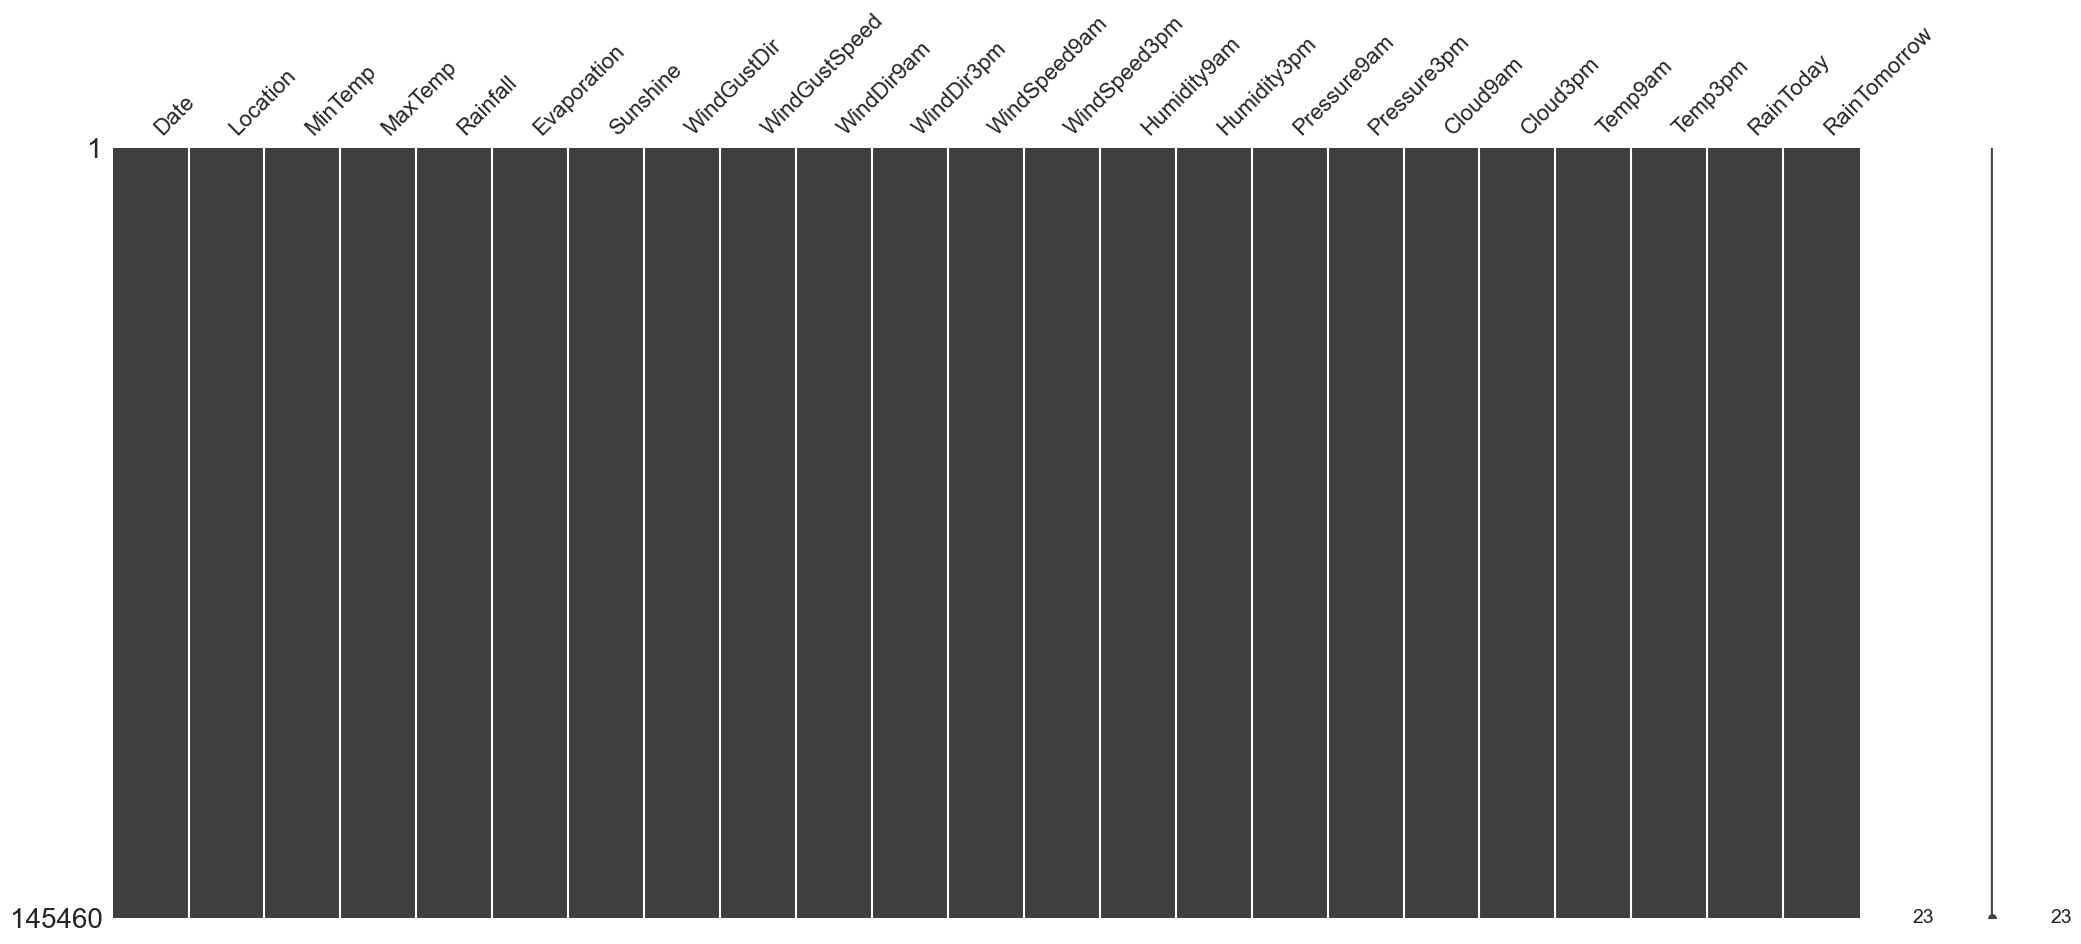

In [17]:
msno.matrix(data)

In [27]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.90,0.6,5.64,8.66,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,4.2,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.10,0.0,8.08,9.80,14,44.0,6,...,44.0,25.0,1010.6,1007.8,0.6,1.6,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.70,0.0,4.52,9.50,15,46.0,13,...,38.0,30.0,1007.6,1008.7,0.4,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.00,0.0,4.04,7.20,4,24.0,9,...,45.0,16.0,1017.6,1012.8,2.8,1.8,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.30,1.0,5.12,10.46,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.40,0.0,5.20,9.24,0,31.0,9,...,51.0,24.0,1024.6,1020.3,1.6,1.6,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.30,0.0,3.44,8.96,6,22.0,9,...,56.0,21.0,1023.5,1019.1,0.8,2.0,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.90,0.0,4.96,9.30,3,37.0,9,...,53.0,24.0,1021.0,1016.8,1.6,2.2,12.5,26.1,0,0
145458,2017-06-24,Uluru,7.8,27.00,0.0,6.40,10.42,9,28.0,10,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [29]:
data['Location'] = le.fit_transform(data['Location'])

In [31]:
data['Date'] = pd.to_datetime(data['Date'])

# Extract year, month, and day as separate features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Drop the original 'Date' column since we now have numerical features
data = data.drop(columns=['Date'])

In [32]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.90,0.6,5.64,8.66,13,44.0,13,14,...,1007.1,8.0,4.2,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.10,0.0,8.08,9.80,14,44.0,6,15,...,1007.8,0.6,1.6,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.70,0.0,4.52,9.50,15,46.0,13,15,...,1008.7,0.4,2.0,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.00,0.0,4.04,7.20,4,24.0,9,0,...,1012.8,2.8,1.8,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.30,1.0,5.12,10.46,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.40,0.0,5.20,9.24,0,31.0,9,1,...,1020.3,1.6,1.6,10.1,22.4,0,0,2017,6,21
145456,41,3.6,25.30,0.0,3.44,8.96,6,22.0,9,3,...,1019.1,0.8,2.0,10.9,24.5,0,0,2017,6,22
145457,41,5.4,26.90,0.0,4.96,9.30,3,37.0,9,14,...,1016.8,1.6,2.2,12.5,26.1,0,0,2017,6,23
145458,41,7.8,27.00,0.0,6.40,10.42,9,28.0,10,3,...,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6,24


data sudah terinput dan sudah tidak ada missing values. Langkah selanjutnya yaitu modeling menggunakan ANN

# Modeling

In [33]:
X = data.drop(columns=['RainTomorrow'])
y = data['RainTomorrow']

In [34]:
ss = StandardScaler()
X_std = ss.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_std,y, test_size=0.2, random_state=42)

In [36]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

### Membuat model ANN

In [37]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

# initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 50
output_size = 1

model = NeuralNetwork(input_size, hidden_size, output_size)
criterion = nn.BCELoss() #binary cross entropy for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Model Training

In [38]:
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    
    #Forward pass
    output = model(X_train)
    loss = criterion(output, y_train)
    
    # Backward an optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        
print("Training complete")

Epoch [10/100], Loss: 0.6023
Epoch [20/100], Loss: 0.5466
Epoch [30/100], Loss: 0.5043
Epoch [40/100], Loss: 0.4720
Epoch [50/100], Loss: 0.4472
Epoch [60/100], Loss: 0.4283
Epoch [70/100], Loss: 0.4142
Epoch [80/100], Loss: 0.4038
Epoch [90/100], Loss: 0.3962
Epoch [100/100], Loss: 0.3906
Training complete


### Model Evaluation

In [39]:
model.eval()

with torch.inference_mode():
    predictions = model(X_test)
    predictions = (predictions >= 0.5).float() #convert possibilities to binary output (0 or 1)

# convert pred's and targets to numpy arrays for evaluation
y_test_np = y_test.numpy()
predictions_np = predictions.numpy()

# Evaluate using accuracy, confussion matrix, and classification report
accuracy = accuracy_score(y_test_np, predictions_np)
cm = confusion_matrix(y_test_np, predictions_np)
cp = classification_report(y_test_np, predictions_np, target_names=['No Rain', 'Rain'])

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(cp)

Accuracy: 0.8281
Confusion Matrix:
[[21356  1316]
 [ 3686  2734]]
Classification Report:
              precision    recall  f1-score   support

     No Rain       0.85      0.94      0.90     22672
        Rain       0.68      0.43      0.52      6420

    accuracy                           0.83     29092
   macro avg       0.76      0.68      0.71     29092
weighted avg       0.81      0.83      0.81     29092



Dari hasil prediksi klasifikasi menggunakan ANN cukup bagus. Tapi masih memungkinkan untuk meningkatkan performa model dan akurasinya dengan berbagai cara seperti hyperparameter tuning, handling class imbalance, eksperimentasi degan arsitektur modelnya, dan feature engineering